# Simulated Autonomous Car
Below, you will see the steps undertaken in using behavioural cloning and deep neral networks in developing an autonous car in a simulated environment using Udacity's simulator.

In [75]:
#imports
import numpy as np
import random
import pandas as pds
import os
import math
import cv2
import matplotlib.pyplot as mpPlot
import matplotlib.image as mpImage
%matplotlib inline

# Fetching Collected Data
I drove the car around the simulator tracks in order to collect data for the behavioural cloning. To ensure a diverse dataset, I drove the car in different directions to avoid collecting biased data from a track that may have, for example, more right turns than left turns.

In [76]:
logPath = ['Jungle Track', 'Normal Track']

columns = ['centre view', 'left view', 'right view', 'steering', 'accelerator', 'brake', 'speed']

def parse_logs(logPath):
    '''
    Parse the driving logs, customise the image paths and concatenate all the logs in a single Pandas
    DataFrame
    :params logPath: List of all the driving log paths
    :return: Pandas DataFrame
    '''
    frames = []
    for i, logPath in enumerate(logPath):
        df = pds.read_csv(logPath + '/driving_log.csv')
        df.columns = columns
        for column in columns[:3]:
            df[column] = df[column].apply(lambda x: '/'.join(x.split('/')[-3:]))

        frames.append(df)
    return pds.concat(frames, ignore_index=True)

df = parse_logs(logPath)
image = cv2.imread(df.loc[0]['centre view'].strip())



# Summarise the Data
Below we will look at various aspects relating to our collected data

In [77]:
# Data set summarisation
print('                                                             Jungle Track      Normal Track      Total\n\n')
dfs = pds.read_csv('Jungle Track/driving_log.csv')
dfs1 = pds.read_csv('Normal Track/driving_log.csv')
print('Number of scene frames:                                      {}'.format(len(dfs))
      +'              {}'.format(len(dfs1))
      +'              {}'.format(len(df)))

print('\nTotal frames (including the Left/Right perspectives):        {}'.format(len(dfs) * 3)
      +'             {}'.format(len(dfs1) * 3)
      +'             {}'.format(len(df) * 3))

print('\n\n\nImage shape: {}\n'.format(image.shape))


                                                             Jungle Track      Normal Track      Total


Number of scene frames:                                      9458              9473              18931

Total frames (including the Left/Right perspectives):        28374             28419             56793



Image shape: (160, 320, 3)



# Visualise the Data
Below gives a distribution of the steering angles recorded in the data.


Average number samples/bin: 371.19607843137254
Threshold 445


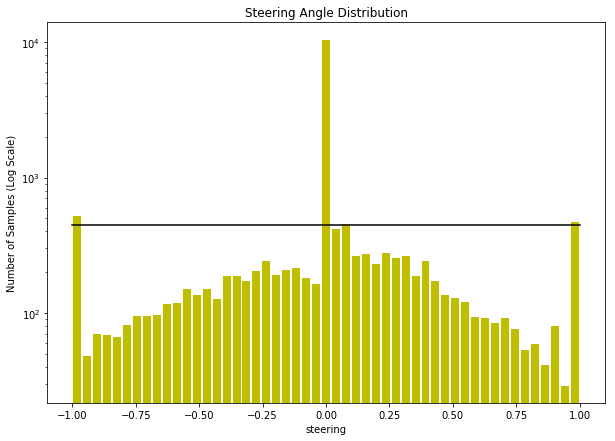

In [78]:

# Steering angle distribution graph 
histogram, bins = np.histogram(df.steering, 51)
center = (bins[:-1] + bins[1:])/2

mpPlot.figure(figsize=(10,7))
mpPlot.bar(center, histogram, align='center', width=(bins[0] - bins[1])*0.8, log=True, fc='y', color='g')
mpPlot.title('Steering Angle Distribution')
mpPlot.ylabel('Number of Samples (Log Scale)')
mpPlot.xlabel('steering')
meanNumSamples = len(df['steering']) / 51
threshold = int(meanNumSamples * 1.2)
mpPlot.plot((df['steering'].min(), df['steering'].max()), (threshold, threshold), 'k-')

print('Average number samples/bin: {}'.format(meanNumSamples))
print('Threshold {}'.format(threshold))

This data is insufficient as it contains far more data towards the centre of the distribution, which will lead to bias and less diversity when training the neural network. In order to provide better learning data, the data must be 'cleaned', meaning deleting data above a certain threshold (marked in the distribution above), in order to bring about a more balanced and accurate dataset.

In [79]:
#Cleaning up the data
excessData = histogram - threshold
df = df.drop(excessData).reset_index(drop=True)
mpPlot.hist(df, 51, rwidth=0.8, align='mid', histtype='bar', log=True)
mpPlot.title('Steering angle dist (post cleanup)')
mpPlot.ylabel('# samples (Log scale)')
mpPlot.xlabel('steering angle')

ValueError: labels [-397 -375 -376 -379 -364 -350 -350 -348 -329 -326 -296 -309 -296 -318 -259
 -259 -272 -240 -204 -256 -237 -232 -265 -281  -30 -180 -172 -215 -168 -193
 -182 -259 -205 -273 -309 -316 -325 -352 -354 -361 -353 -369 -392 -386 -404
 -365 -416] not contained in axis